# Brain Computer Interface
## Author: Rodrigo de Lima Florindo (Matrícula: 101809)

O principal objetivo deste projeto é avaliar o desempenho de um Perceptron de Rosenblatt (Perceptron Simples) na classificação de estímulos visuais humanos.

### Parte 1 - Compreendendo o conjunto de dados (Análise exploratória)
Eu plotei o valor médio das séries temporais para as frequências de 8 e 9 Hz, apenas para observar como elas se comportam. Parece haver um deslocamento considerável na média das séries temporais, mas seus desvios-padrão são um pouco diferentes. Isso indica que este possa ser linearmente separável. Além disso, parece ser desnecessário escalonar as amostras das séries temporais para treinamento do pereceptron, tendo em vista que cada uma das amostras das formas de onda são de mesma dimensão.

<>:8: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\S'
C:\Users\rodri\AppData\Local\Temp\ipykernel_15288\4001965908.py:8: SyntaxWarning: invalid escape sequence '\S'
  mat_contents = sio.loadmat('Dataset\S10.mat')


(1250, 6)


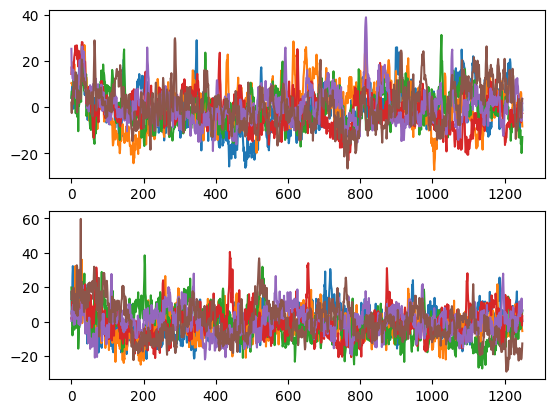

Time series means for f1 = 8Hz:  0.009595701636839657
Standard deviation for f1 = 8Hz:  8.962312224166046
Time series means for f2 = 9Hz:  -1.1265019012258388
Standard deviation for f2 = 9Hz:  8.04840855284447


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

mat_contents = sio.loadmat('Dataset\S10.mat')
data = mat_contents['data']
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(np.mean(data[60,126:1376,0,:], axis=1))
ax2.plot(np.mean(data[60,126:1376,5,:], axis=1))
print(np.shape(data[60,126:1376,0,:]))
plt.show()

print('Time series means for f1 = 8Hz: ', np.mean(data[60,126:1376,0,:]))
print('Standard deviation for f1 = 8Hz: ', np.std(data[60,126:1376,0,:]))
print('Time series means for f2 = 9Hz: ', np.mean(data[60,126:1376,5,:]))
print('Standard deviation for f2 = 9Hz: ', np.std(data[60,126:1376,5,:]))

### Parte 2 - Tarefas do Projeto 2

2) Agora podemos criar os vetores de entrada e a saída desejada (target input), como mostrado abaixo. Além disso, também separamos de forma aleatória os dados de treino e de teste a seguir.

In [8]:
X_raw = data[60,126:1376,[0,5],:]
print(np.shape(X_raw))
# Reorder to (classes, realizations, time) -> (2, 6, 1250), then merge (2*6) -> (12, 1250)
X = X_raw.transpose(0, 2, 1).reshape(-1, X_raw.shape[1])
print(np.shape(X))
y = np.concatenate([np.ones(6), -np.ones(6)])
print(np.shape(y))
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, stratify=y, random_state=9
)
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

print(y_train)
print(y_test)


(2, 1250, 6)
(12, 1250)
(12,)
(8, 1250)
(8,)
(4, 1250)
(4,)
[-1.  1.  1.  1. -1.  1. -1. -1.]
[-1.  1.  1. -1.]


3) Implementação do Perceptron a seguir:

In [9]:
clf = Perceptron(
    max_iter=10000,
    tol=1e-3,
    eta0=1.0, # learning rate
)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Metrics
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.3f}")
print("Confusion matrix:\n", cm)
print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=3))

Accuracy: 0.500
Confusion matrix:
 [[1 1]
 [1 1]]

Classification report:
              precision    recall  f1-score   support

        -1.0      0.500     0.500     0.500         2
         1.0      0.500     0.500     0.500         2

    accuracy                          0.500         4
   macro avg      0.500     0.500     0.500         4
weighted avg      0.500     0.500     0.500         4



4) Devido ao baixo número de realizações, é difícil de inferir como os pesos iniciais e o learning rate afetam a performance do modelo, contudo, ilustra-se mais um exemplo com semente aleatória de separação das realizações de treino e teste a seguir.

In [10]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X, y, test_size = 0.33, stratify=y, random_state=11
)

clf_new = Perceptron(
    max_iter=10000,
    tol=1e-3,
    eta0=5, # learning rate
)

clf_new.fit(X_train_new, y_train_new)

y_pred_new = clf_new.predict(X_test_new)

acc = accuracy_score(y_test_new, y_pred_new)
cm = confusion_matrix(y_test_new, y_pred_new)

print(f"Accuracy: {acc:.3f}")
print("Confusion matrix:\n", cm)
print("\nClassification report:")
print(classification_report(y_test_new, y_pred_new, digits=3))

Accuracy: 0.750
Confusion matrix:
 [[1 1]
 [0 2]]

Classification report:
              precision    recall  f1-score   support

        -1.0      1.000     0.500     0.667         2
         1.0      0.667     1.000     0.800         2

    accuracy                          0.750         4
   macro avg      0.833     0.750     0.733         4
weighted avg      0.833     0.750     0.733         4



5) O problema não é linearmente separável, pois o perceptron simples não foi capaz de achar uma solução que classifique com 100% de acurácia as séries temporais estudadas, mesmo considerando diferentes configurações de pesos iniciais e learning rates. É importante ressaltar que os pesos iniciais da `Perceptron` do `sklearn` são amostrados de uma distribuição uniforme. Mesmo tendo simulado várias vezes, não foi possível observar mudanças no sumário de resultados, o que indica que a inicialização dos pesos não impactou significativamente os resultados.

6) As matrizes de confusão foram apresentadas anteriormente.

7) A computação das FFTs das primeiras séries temporais para 8 e 9 Hz são mostradas a seguir. Aparentemente, existe uma leve subida das magnitudes das FFTs para 8 e 9 Hz, mas ambos traçados são extremamente parecidos. Portanto, é possível concluir que, para o sensor avaliado (61), é difícil de se classificar as frequências estudadas.

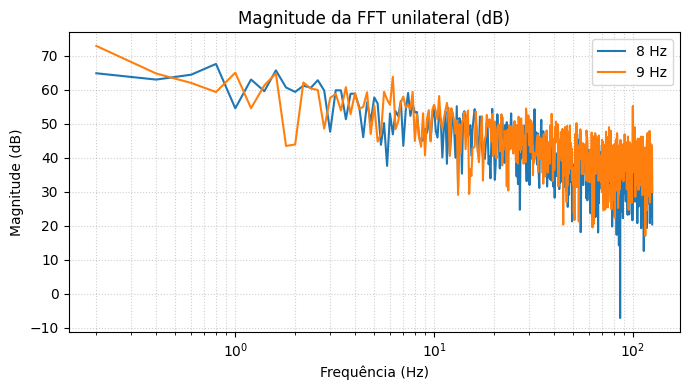

In [11]:
Fs = 250
N  = 1250 

series8Hz = X[3, :]
series9Hz = X[8, :]

freq = np.fft.rfftfreq(N, d=1/Fs) 
fft8  = np.fft.rfft(series8Hz)
fft9  = np.fft.rfft(series9Hz)

mag8_db = 20*np.log10(np.abs(fft8))
mag9_db = 20*np.log10(np.abs(fft9))

freq_nz   = freq[1:]
mag8_db_n = mag8_db[1:]
mag9_db_n = mag9_db[1:]

fig, ax = plt.subplots(figsize=(7,4))
ax.semilogx(freq_nz, mag8_db_n, label='8 Hz')
ax.semilogx(freq_nz, mag9_db_n, label='9 Hz')

ax.set_title('Magnitude da FFT unilateral (dB)')
ax.set_xlabel('Frequência (Hz)')
ax.set_ylabel('Magnitude (dB)')
ax.grid(True, which='both', linestyle=':', alpha=0.6)
ax.legend()
plt.tight_layout()
plt.show()

9) Uma técnica comum de se diminuir a dimensionalidade de séries temporais ou vídeos para o treinamento de redes neurais é a principal component analysis (PCA). Esta ferramenta poderia também ser utilizada neste caso.